### Multiple linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [4]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### visualization

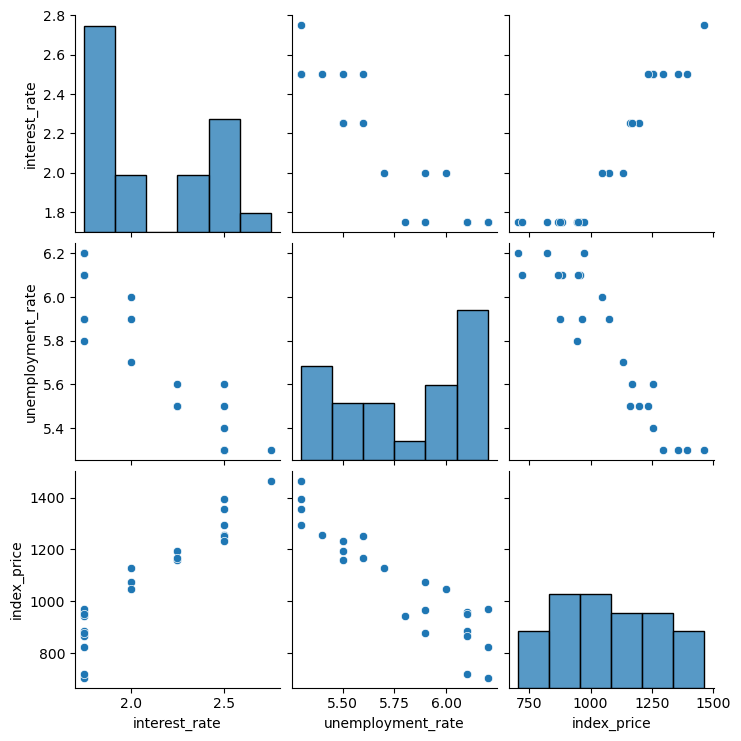

In [6]:
import seaborn as sns
sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

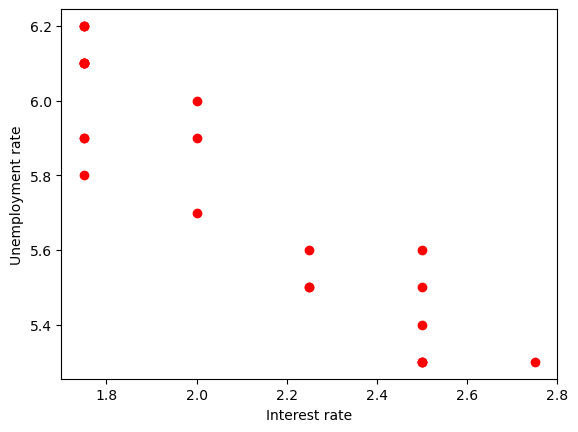

In [8]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [9]:
#dependant and independant features
#X=df_index[['interest_rate','unemployment_rate']]
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [10]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

### Model training

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
import seaborn as sns

C:\Users\94775\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

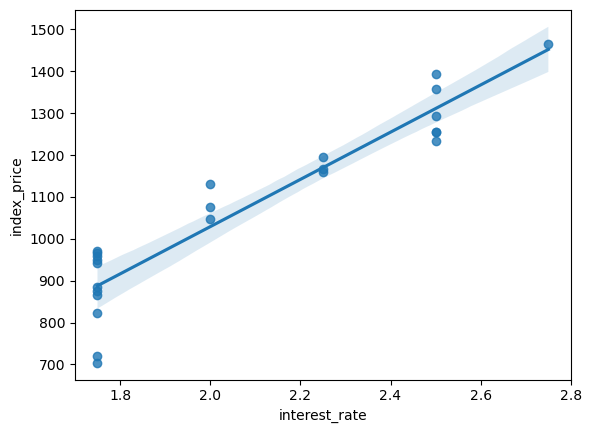

In [14]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

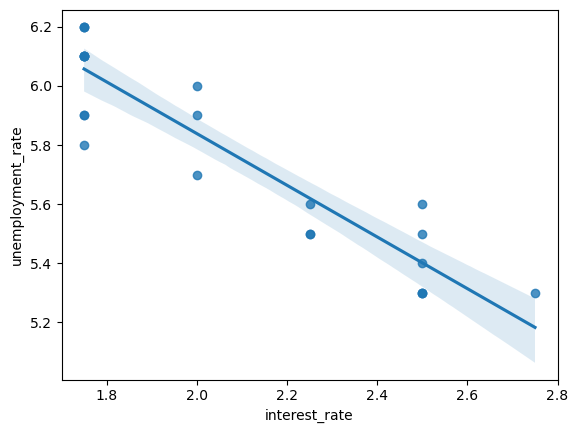

In [15]:
sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])

- shaded range shows that we can do hyperparameter tuning in these areas

### Scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [18]:
x_train   #converted dataframe into 2D array

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
regression.fit(x_train,y_train)

LinearRegression()

### Cross validation

- for every cross validation, we'll get a MSE value
- here we're always getting negative MSE value, since scoring parameter is set to negative
- finally get the avg of all MSE values and consider that as the accuracy value

In [21]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [23]:
np.mean(validation_score)

-5914.828180162396

In [24]:
y_pred=regression.predict(x_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

### Performance metrics

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010254


In [28]:
#adjusted r square
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5985619231683756

### Assumptions

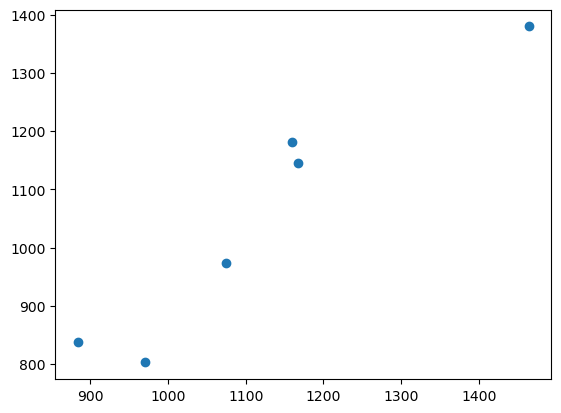

In [29]:
plt.scatter(y_test,y_pred)

In [30]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


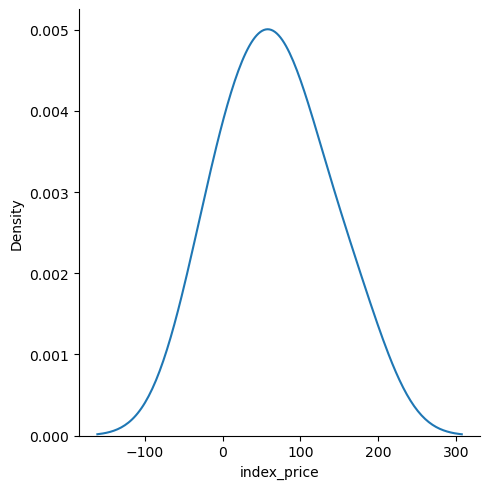

In [32]:
#plot residuals
sns.displot(residuals,kind='kde')   #kde=kernel density estimator

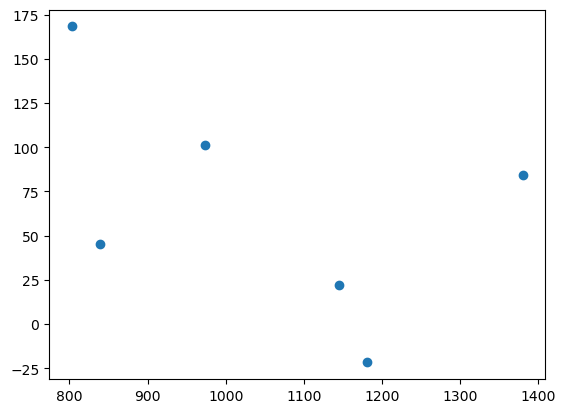

In [33]:
#scatter plot with respect to residuals and predictions
plt.scatter(y_pred,residuals)

- above diagram follows uniformity distribution which means it follows no pattern. data is here and there

### OLS technique

In [34]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [35]:
model.summary()

C:\Users\94775\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                       0.754
Time:                        17:36:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(regression.coef_)

[  88.27275507 -116.25716066]
